# ===========================
# Benchmarking
### Correlation Coefficients of Global layout/Spring layout to Network Distance
# ===========================

In [1]:
from benchmark_main import *

_________
_________
# 2D EVALULATION
_________
_________

In [114]:
################################################
#
# C A Y L E Y T R E E 
#
################################################

organism = 'tree'
n = 1093
r = 3
G = nx.full_rary_tree(r,n)

# precalculated Network Distance 
b_file1k = open('netdist_precalc/dist_network_1093_tree.pkl', "rb")
dist_network1k = pickle.load(b_file1k)
print('1000 done')

1000 done


### GLOBAL 

In [132]:
# GLOBAL LAYOUT 

#-----------------------------
# UMAP PARAMETERS:
#-----------------------------
n_neighbors = 8
spread = 1.0
min_dist = 0.0
metric = 'cosine'
lnr = 1
nep = None

feature = 'RWRvis'
r = .9
alpha = 1.0

print('RWR')
start = time.time()
posG_global = globallayout_2D(G,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

pairs = list(dist_network1k.keys())
dist_global = pairwise_layout_distance_linalg(pairs,posG_global)

r_global = pearson_corrcoef(dist_network1k, dist_global)
print('RWR corr coef: ',r_global)

RWR
Execution Time: 00:00:04
596778
1k done
10k done
50k done
100k done
500k done
complete
done layout distances prep
calculate pearson correlation coefficient
RWR corr coef:  0.9783834434796077


In [133]:
d_plot_global = {}
for spldist in range(1,int(max(dist_network1k.values()))+1):
    l_s = []
    for k, v in dist_network1k.items():
        if v == spldist:
            l_s.append(k)
    l_xy = []
    for nodes in l_s:
        dxy = dist_global[nodes]
        l_xy.append(dxy)
    d_plot_global[spldist] = l_xy

### NODE2VEC

### FORCE-DIRECTED | NETWORKX 

In [139]:
print('SPRING')
start = time.time()
posG_spring_nx = springlayout_2D(G,itr=40)
end = time.time()
m,s = exec_time(start,end)

pairs = list(dist_network1k.keys())
dist_spring_nx = pairwise_layout_distance_linalg(pairs,posG_spring_nx)

r_spring_nx = pearson_corrcoef(dist_network1k, dist_spring_nx)
print('SPRING corr coef: ',r_spring_nx)

SPRING
Execution Time: 00:00:05
596778
1k done
10k done
50k done
100k done
500k done
complete
done layout distances prep
calculate pearson correlation coefficient
SPRING corr coef:  0.9516775205936331


In [140]:
d_plot_spring_nx = {}
for spldist in range(1,int(max(dist_network1k.values()))+1):
    l_s = []
    for k, v in dist_network1k.items():
        if v == spldist:
            l_s.append(k)
    l_xy = []
    for nodes in l_s:
        try:
            dxy = dist_spring_nx[nodes]
            l_xy.append(dxy)
        except:
            pass
    d_plot_spring_nx[spldist] = l_xy

### FORCE-DIRECTED | IGRAPH

In [150]:
iG = ig.Graph.from_networkx(G)

print('SPRING - igraph')
start = time.time()
posG  = iG.layout_fruchterman_reingold(niter=28000)
posG_spring_ig = dict(zip(G.nodes(),posG))

posG_spring_ig_norm = minmaxscaling_posG(posG_spring_ig)

end = time.time()
m,s = exec_time(start,end)

pairs=list(dist_network1k.keys())
dist_spring_ig = pairwise_layout_distance_linalg(pairs,posG_spring_ig_norm)

r_spring_ig = pearson_corrcoef(dist_network1k, dist_spring_ig)
print('SPRING corr coef: ',r_spring_ig)

SPRING - igraph
Execution Time: 00:00:05
596778
1k done
10k done
50k done
100k done
500k done
complete
done layout distances prep
calculate pearson correlation coefficient
SPRING corr coef:  0.9854180171801443


In [151]:
d_plot_spring_ig = {}
for spldist in range(1,int(max(dist_network1k.values()))+1):
    l_s = []
    for k, v in dist_network1k.items():
        if v == spldist:
            l_s.append(k)
    l_xy = []
    for nodes in l_s:
        try:
            dxy = dist_spring_ig[nodes]
            l_xy.append(dxy)
        except:
            pass
    d_plot_spring_ig[spldist] = l_xy

## DIAGRAM

/users/christiane.huetter/miniconda3/envs/myenv_clip2/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



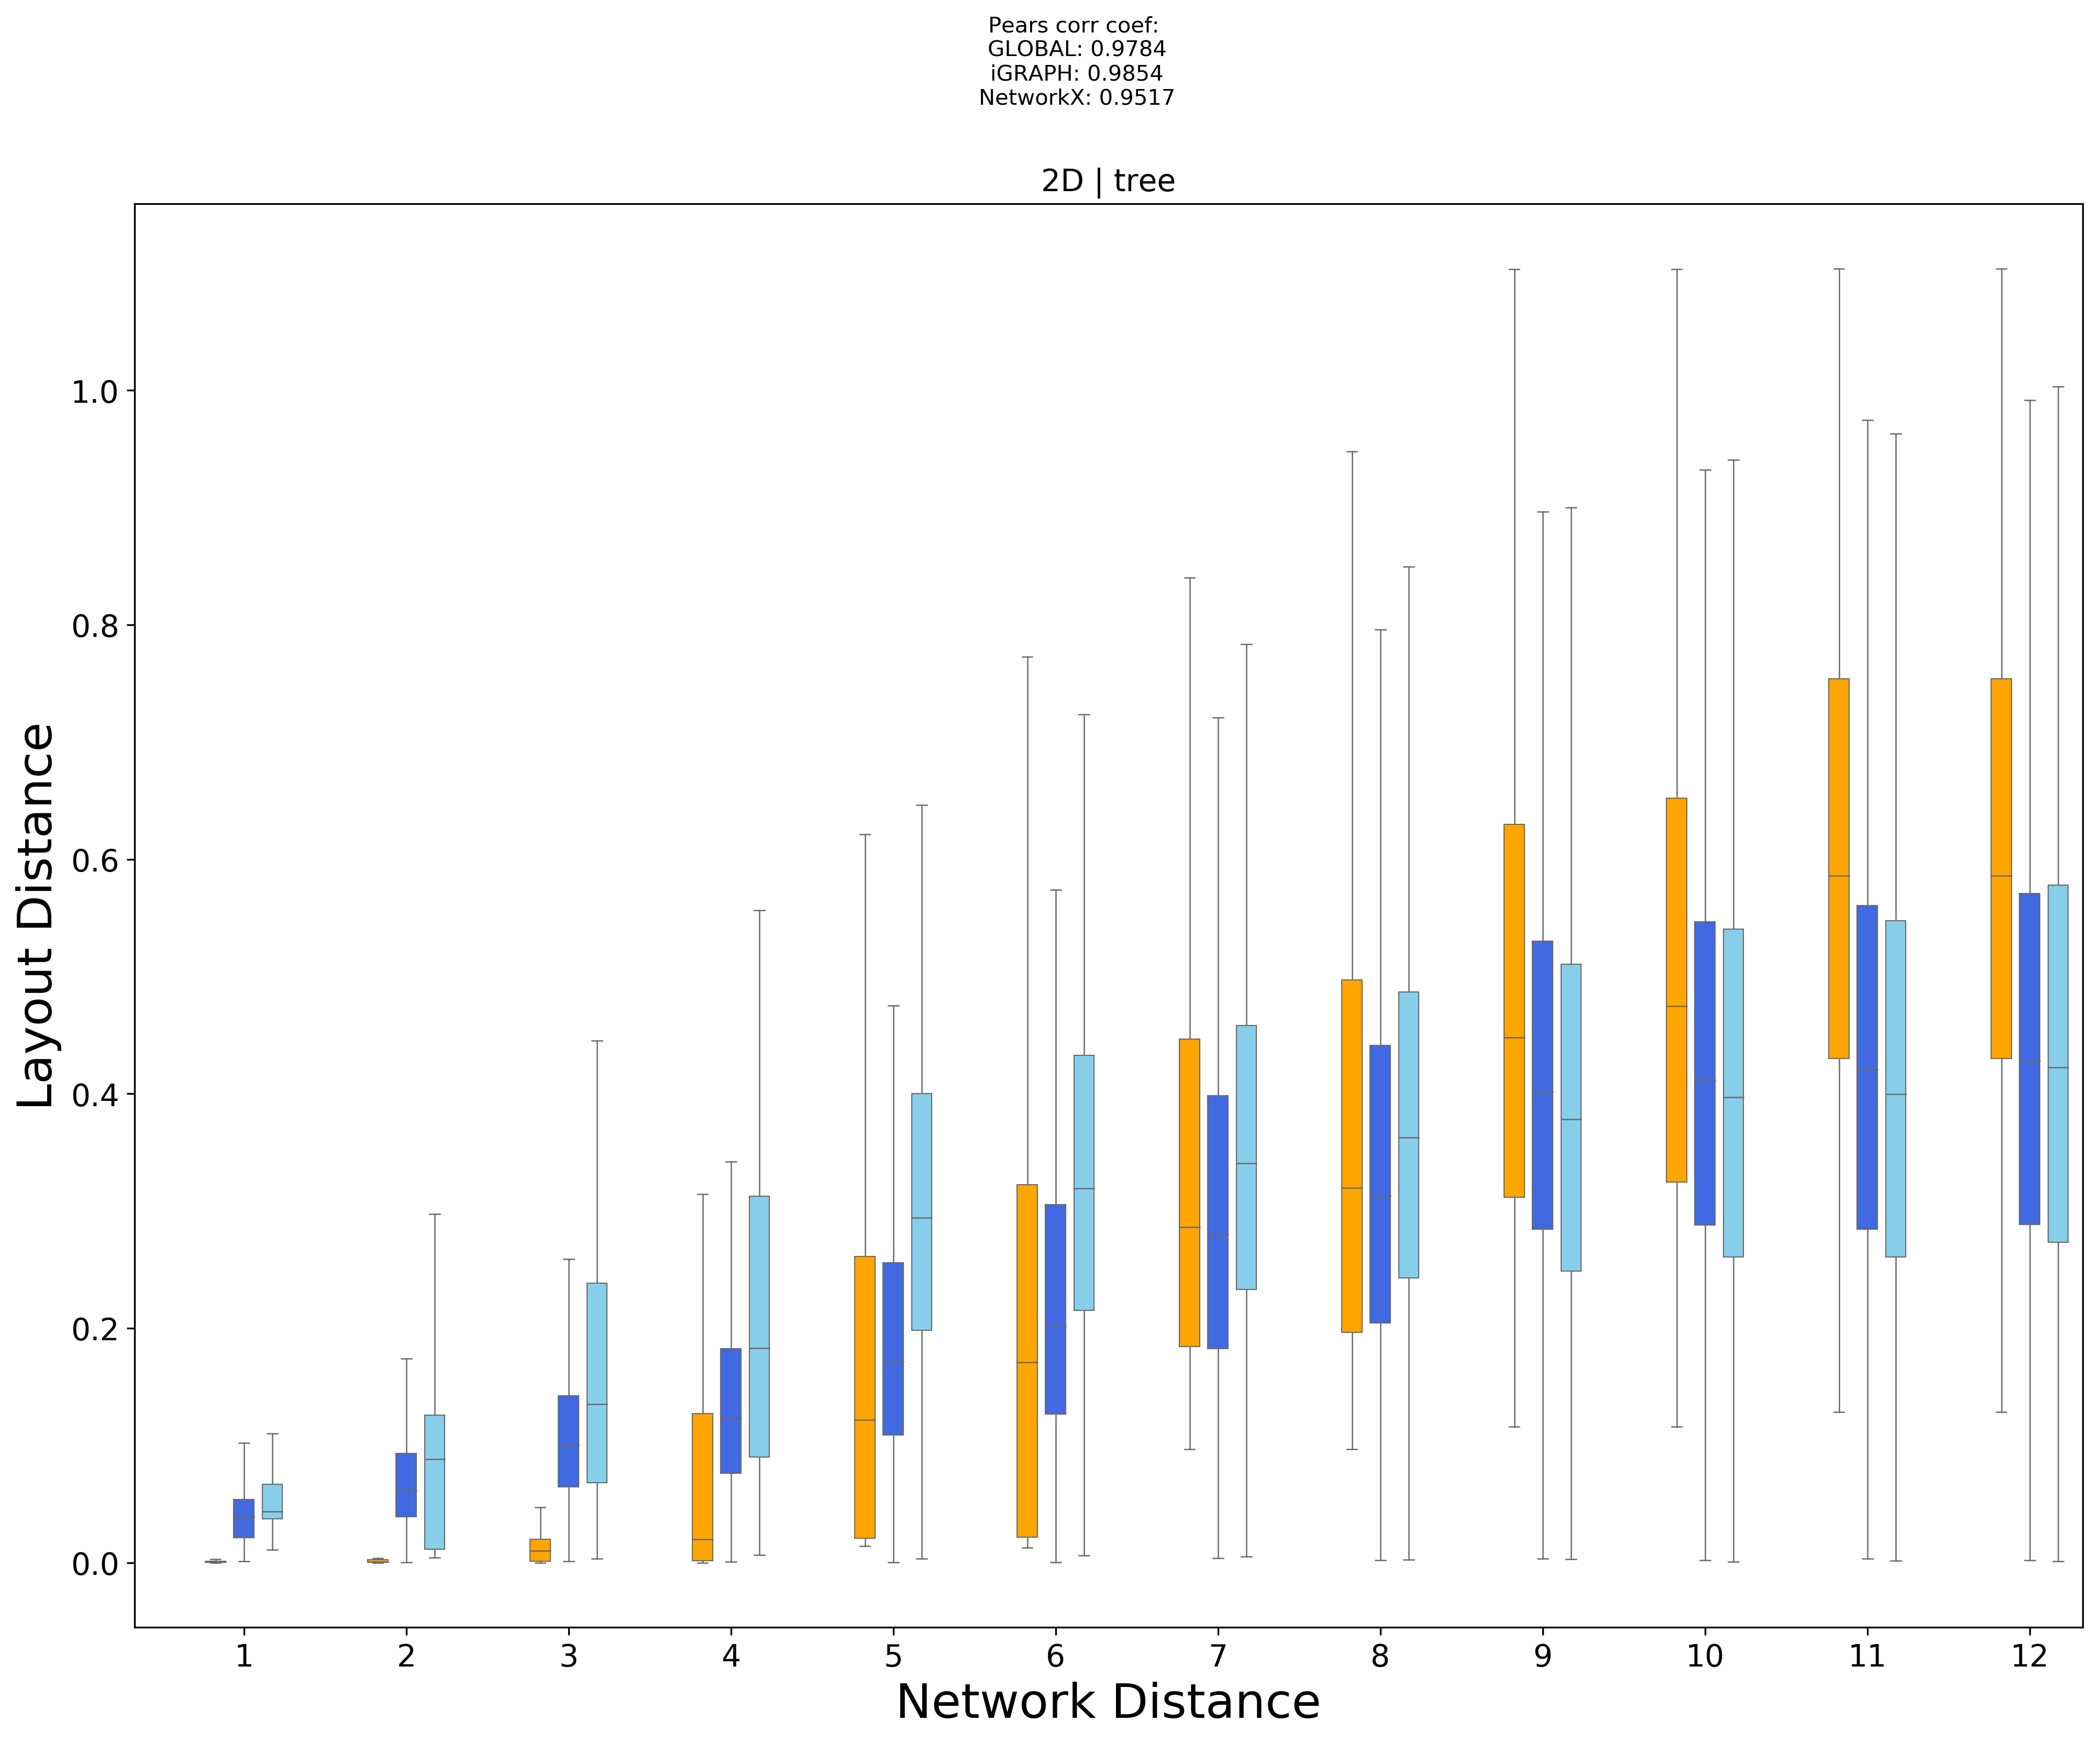

In [152]:
offset = 0.05
width_box = 0.125
boxdist = width_box # 0.01

fig, ax = plt.subplots(figsize =(16,12), dpi=300)
bp_spring_nx = ax.boxplot(d_plot_spring_nx.values(), positions=[i+offset+boxdist for i in list(d_plot_spring_nx.keys())], widths=width_box, patch_artist=True, showfliers=False)
bp_spring_ig = ax.boxplot(d_plot_spring_ig.values(), positions=[i for i in list(d_plot_spring_ig.keys())], widths=width_box, patch_artist=True, showfliers=False)
bp_global = ax.boxplot(d_plot_global.values(), positions=[i-offset-boxdist for i in list(d_plot_global.keys())], widths=width_box, patch_artist=True, showfliers=False)
#bp_nodevec= ax.boxplot(d_plot_nodevec.values(), positions=[i-offset*1.5 for i in list(d_plot_nodevec.keys())], widths=width_box, patch_artist=True, showfliers=False)

for element in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
    plt.setp(bp_spring_nx[element], color='dimgrey', linewidth=0.6)
    plt.setp(bp_spring_ig[element], color='dimgrey', linewidth=0.6)
    plt.setp(bp_global[element], color='dimgrey', linewidth=0.6)
    #plt.setp(bp_nodevec[element], color='dimgrey', linewidth=0.6)
    

for patch in bp_spring_nx['boxes']:
    patch.set(facecolor='skyblue', linewidth=0.5)
for patch in bp_spring_ig['boxes']:
    patch.set(facecolor='royalblue', linewidth=0.5)

for patch in bp_global['boxes']:
    patch.set(facecolor='orange', linewidth=0.5)
#for patch in bp_nodevec['boxes']:
#    patch.set(facecolor='redorange', linewidth=0.5)

plt.xlabel('Network Distance', fontsize=22)
plt.ylabel('Layout Distance', fontsize=22)

plt.xticks(range(1,len(d_plot_spring.keys())+1),d_plot_spring_nx.keys(), fontsize=14)
plt.yticks(fontsize=14)

plt.title('2D | '+organism, fontsize=14)
plt.suptitle('Pears corr coef: '+'\n'+'GLOBAL: '+str(round(r_global,4))+'\n'+'iGRAPH: '+str(round(r_spring_ig,4))+'\n'+'NetworkX: '+str(round(r_spring_nx,4)), fontsize=10)

plt.show()
fig.savefig('../output_plots/benchmark/2Dtoynetwork_NetworkDistances_'+organism+'.png')

_________
_________
# 3D EVALULATION
_________
_________

In [208]:
################################################
#
# C U B E G R I D
#
################################################

organism = 'grid'

G = nx.grid_graph([10,10,10],periodic=False)

# precalculated Network Distance 
b_file1k = open('netdist_precalc/dist_network_1000_cube.pkl', "rb")
dist_network1k = pickle.load(b_file1k)
print('1000 done')

1000 done


In [225]:
################################################
#
# T O R U S L A T T I C E 
#
################################################

organism = 'torus'

G = nx.grid_2d_graph(44,22,periodic=True)

# precalculated Network Distance
b_file1k = open('netdist_precalc/dist_network_968_torus.pkl', "rb")
dist_network1k = pickle.load(b_file1k)
print('1000 done')

1000 done


In [ ]:
# GLOBAL LAYOUT 

#-----------------------------
# UMAP PARAMETERS:
#-----------------------------
n_neighbors = 10
spread = 1
min_dist = 0.0
metric = 'cosine'
lnr = 1
nep = None

feature = 'RWRvis'
r = .9
alpha = 1.0

print('RWR')
start = time.time()
posG_global = globallayout_3D(G,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

pairs = list(dist_network1k.keys())
dist_global = pairwise_layout_distance_linalg(pairs,posG_global)

r_global = pearson_corrcoef(dist_network1k, dist_global)
print('RWR corr coef: ',r_global)

RWR


In [ ]:
d_plot_global = {}
for spldist in range(1,int(max(dist_network1k.values()))+1):
    l_s = []
    for k, v in dist_network1k.items():
        if v == spldist:
            l_s.append(k)
    l_xy = []
    for nodes in l_s:
        dxy = dist_global[nodes]
        l_xy.append(dxy)
    d_plot_global[spldist] = l_xy

### NODE2VEC

### FORCE-DIRECTED | NETWORKX 

In [ ]:
print('SPRING')
start = time.time()
posG_spring_nx = springlayout_3D(G,itr=135)
end = time.time()
m,s = exec_time(start,end)

pairs = list(dist_network1k.keys())
dist_spring_nx = pairwise_layout_distance_linalg(pairs,posG_spring_nx)

r_spring_nx = pearson_corrcoef(dist_network1k, dist_spring_nx)
print('SPRING corr coef: ',r_spring_nx)

In [ ]:
d_plot_spring_nx = {}
for spldist in range(1,int(max(dist_network1k.values()))+1):
    l_s = []
    for k, v in dist_network1k.items():
        if v == spldist:
            l_s.append(k)
    l_xy = []
    for nodes in l_s:
        try:
            dxy = dist_spring_nx[nodes]
            l_xy.append(dxy)
        except:
            pass
    d_plot_spring_nx[spldist] = l_xy

### FORCE-DIRECTED | IGRAPH

In [ ]:
iG = ig.Graph.from_networkx(G)

print('SPRING - igraph')
start = time.time()
posG  = iG.layout_fruchterman_reingold_3d(niter=4600)
posG_spring_ig = dict(zip(G.nodes(),posG))

posG_spring_ig_norm = minmaxscaling_posG(posG_spring_ig)

end = time.time()
m,s = exec_time(start,end)

pairs=list(dist_network1k.keys())
dist_spring_ig = pairwise_layout_distance_linalg(pairs,posG_spring_ig_norm)

r_spring_ig = pearson_corrcoef(dist_network1k, dist_spring_ig)
print('SPRING corr coef: ',r_spring_ig)

In [ ]:
d_plot_spring_ig = {}
for spldist in range(1,int(max(dist_network1k.values()))+1):
    l_s = []
    for k, v in dist_network1k.items():
        if v == spldist:
            l_s.append(k)
    l_xy = []
    for nodes in l_s:
        try:
            dxy = dist_spring_ig[nodes]
            l_xy.append(dxy)
        except:
            pass
    d_plot_spring_ig[spldist] = l_xy

## DIAGRAM

In [ ]:
offset = 0.05
width_box = 0.125
boxdist = width_box # 0.01

fig, ax = plt.subplots(figsize =(16,12), dpi=300)
bp_spring_nx = ax.boxplot(d_plot_spring_nx.values(), positions=[i+offset+boxdist for i in list(d_plot_spring_nx.keys())], widths=width_box, patch_artist=True, showfliers=False)
bp_spring_ig = ax.boxplot(d_plot_spring_ig.values(), positions=[i for i in list(d_plot_spring_ig.keys())], widths=width_box, patch_artist=True, showfliers=False)
bp_global = ax.boxplot(d_plot_global.values(), positions=[i-offset-boxdist for i in list(d_plot_global.keys())], widths=width_box, patch_artist=True, showfliers=False)
#bp_nodevec= ax.boxplot(d_plot_nodevec.values(), positions=[i-offset*1.5 for i in list(d_plot_nodevec.keys())], widths=width_box, patch_artist=True, showfliers=False)

for element in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
    plt.setp(bp_spring_nx[element], color='dimgrey', linewidth=0.6)
    plt.setp(bp_spring_ig[element], color='dimgrey', linewidth=0.6)
    plt.setp(bp_global[element], color='dimgrey', linewidth=0.6)
    #plt.setp(bp_nodevec[element], color='dimgrey', linewidth=0.6)
    

for patch in bp_spring_nx['boxes']:
    patch.set(facecolor='skyblue', linewidth=0.5)
for patch in bp_spring_ig['boxes']:
    patch.set(facecolor='royalblue', linewidth=0.5)

for patch in bp_global['boxes']:
    patch.set(facecolor='orange', linewidth=0.5)
#for patch in bp_nodevec['boxes']:
#    patch.set(facecolor='redorange', linewidth=0.5)

plt.xlabel('Network Distance', fontsize=22)
plt.ylabel('Layout Distance', fontsize=22)

plt.xticks(range(1,len(d_plot_spring_nx.keys())+1),d_plot_spring_nx.keys(), fontsize=14)
plt.yticks(fontsize=14)

plt.title('3D | '+organism, fontsize=14)
plt.suptitle('Pears corr coef: '+'\n'+'GLOBAL: '+str(round(r_global,4))+'\n'+'iGRAPH: '+str(round(r_spring_ig,4))+'\n'+'NetworkX: '+str(round(r_spring_nx,4)), fontsize=10)

plt.show()
fig.savefig('../output_plots/benchmark/3Dtoynetwork_NetworkDistances_'+organism+'.png')